## 1. Getting started with earthkit-plots

Welcome to the **earthkit-plots** user guide!

**earthkit-plots** is the visualisation component of **earthkit**, a collection of Python libraries designed to simplify the process of accessing, processing and **visualising** weather and climate science data.

**earthkit** helps speed up earth science workflows by providing high-level tools which remove large amounts of the boilerplate code usually required for performing common tasks. In this introduction, we are going to use **earthkit-plots** to quickly and conveniently visualise some data on a graph. We will then use **earthkit-data** to work with a geospatial dataset, and visualise it on a map.

### What is earthkit-plots?

**earthkit-plots** leverages the power of the **earthkit** ecosystem to make producing publication-quality scientific graphics as simple and convenient as possible. It is built on top of **matplotlib** and **cartopy**, but provides a very high-level API and a wealth of domain-specific knowledge to provide features like:

- shortcuts and convenience methods which reduce the amount of code you need to write to produce a high-quality visualisation
- formatting of titles and labels using templates which understand a wide range of common metadata standards
- creating and swappong out style libraries based on your organisation, project or personal choice
- automatic styling of data variables based on metadata detection, including unit detection.

### Creating a plot with `quickplot`

The quickest way to get started with earthkit-plots is with the `quickplot` submodule.

In [1]:
import earthkit.plots.quickplot as qplt

`quickplot` contains convenience functions for quickly taking some data and putting it onto a plot. It will style the plot based on whichever style library you have installed (more on that later), and is designed to help you quickly and easily take a look at your data with minimum code.

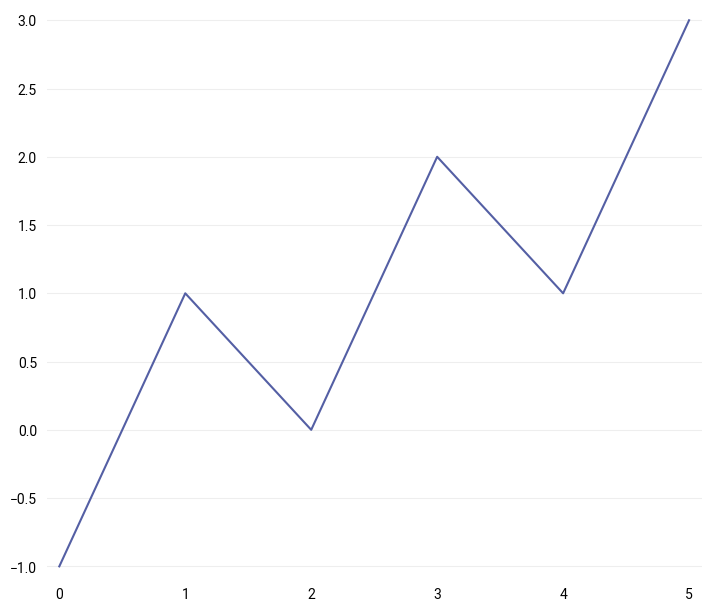

In [2]:
p = qplt.plot([-1, 1, 0, 2, 1, 3])

### Creating a map with `quickmap`

The same principles apply for generating quick plots of geospatial data, for which the `quickmap` submodule should be used. 

In [3]:
import earthkit.plots.quickmap as qmap

We can load in some sample data using the `earthkit-data` package:

In [4]:
import earthkit.data

data = earthkit.data.from_source("sample", "era5-monthly-mean-2t-199312.grib")
data.ls()

era5-monthly-mean-2t-199312.grib:   0%|          | 0.00/1.98M [00:00<?, ?B/s]

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,surface,0,19931201,0,0,an,0,regular_ll


Here we have downloaded some sample data - in this case taken from ECMWF's [ERA5 reanalysis dataset](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=form), specifically the monthly mean air temperature for December 1993. You can learn more about working with a wide range of data formats in the [earthkit-data documentation](https://earthkit-data.readthedocs.io/en/latest/).

Now that we have some data, all we need to do is pass it to quickmap's `plot` function, which will do its best to find a suitable style for the given data:

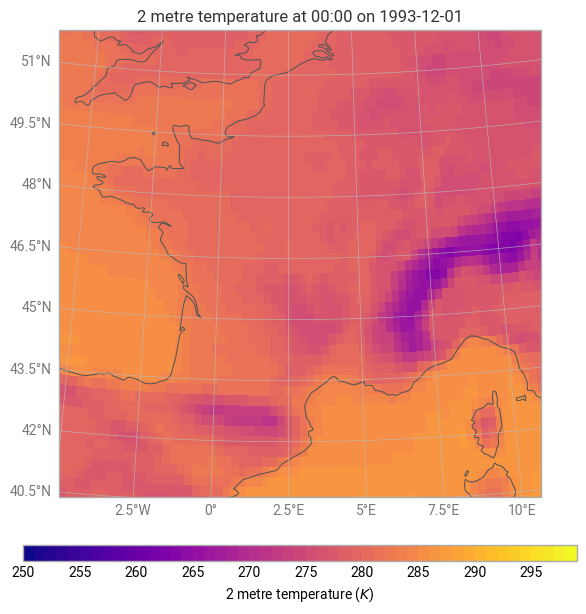

In [5]:
qmap.block(data, domain="France", levels=range(250, 300))

In this case, using the default style library built into earthkit-plots, a pre-defined style which matches the input data has been found and applied. This is optional behaviour, which can be switched off temporarily or permanently using the earthkit-plots `schema` system, which will be explored in more detail later in this user guide.

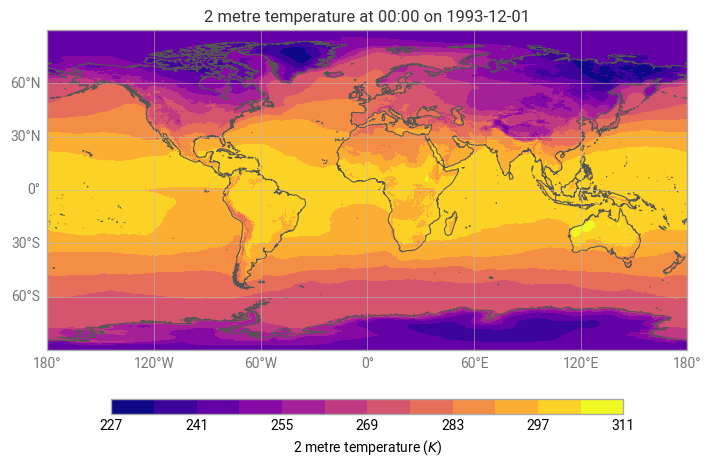

In [6]:
with earthkit.plots.schema.set(automatic_styles=False):
    qmap.plot(data)

We can also pass information to `quickmap` about the domain on which we would like to visualise the data, or the units that we would like to use.

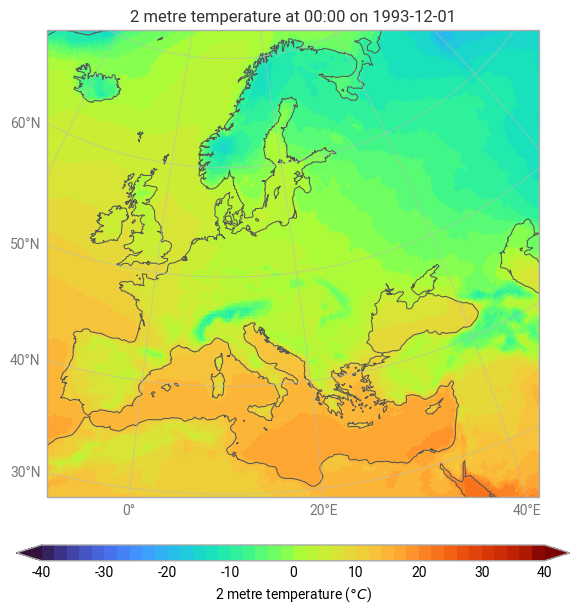

In [7]:
qmap.plot(data, domain="Europe", units="celsius")